In [34]:
import pandas as pd
import numpy as numpy
from mlxtend.plotting import plot_decision_regions

In [35]:
df = pd.DataFrame()

In [36]:
df['x1']=[1,2,3,4,5,6,6,7,9,9]
df['x2']=[5,3,6,8,1,9,5,8,9,2]
df['label']=[1,1,0,1,0,1,0,1,0,0]
df

,x1,x2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='x1', ylabel='x2'>

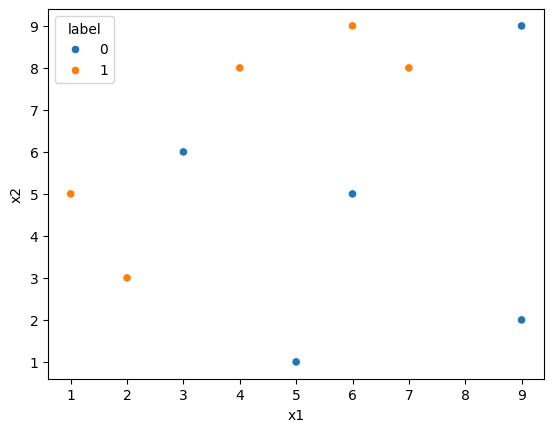

In [37]:
import seaborn as sns
sns.scatterplot(x='x1',y='x2',hue='label',data=df)

In [38]:
df['weights']= 1/df.shape[0]

In [39]:
df


,x1,x2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [42]:
x= df.iloc[:,0:2].values
y =df.iloc[:,2].values

In [43]:
#step2 - trian 1st model
dt1.fit(x,y)

DecisionTreeClassifier(max_depth=1)

In [44]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.625, 0.5, '  False')]

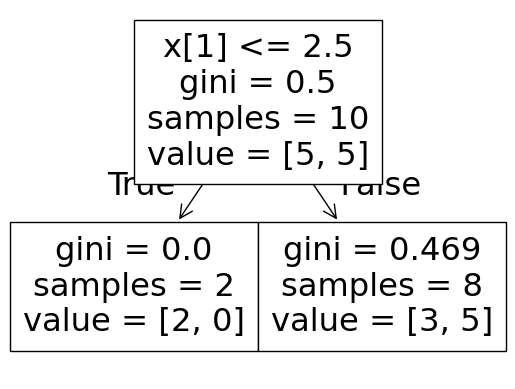

In [45]:
plot_tree(dt1)

<Axes: >

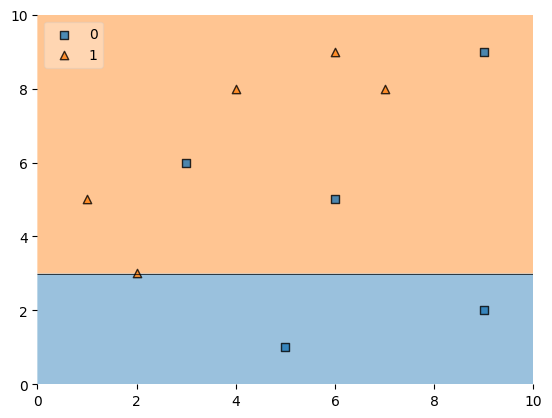

In [46]:
plot_decision_regions(x,y,dt1,legend=2)

In [47]:
df['y_pred']=dt1.predict(x)
df

,x1,x2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [48]:
import numpy as np

def calculate_model_weight (error):
  return 0.5* np.log((1-error)/(error))

In [49]:
#step3 - calculate model weight
alpha1 = calculate_model_weight(0.3)
alpha1

np.float64(0.42364893019360184)

In [50]:
#step4 -updated weights
def update_row_weights (row,alpha=0.423):
  if row['label']==row['y_pred']:
    return row['weights']*np.exp(-alpha)
  else:
    return row['weights']*np.exp(alpha)

In [51]:
df['updated_weights']= df.apply(update_row_weights,axis=1)
df

,x1,x2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [52]:
df['updated_weights'].sum()

np.float64(0.9165153319682015)

In [53]:
df['normalized_weights']=df['updated_weights']/df['updated_weights'].sum()

In [54]:
df

,x1,x2,label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [55]:
df['normalized_weights'].sum()

np.float64(1.0)

In [56]:
#step 5 - Range
df['cumsum_upper']=np.cumsum(df['normalized_weights'])

In [57]:
df['cumsum_lower']=df['cumsum_upper']-df['normalized_weights']

In [58]:
df[['x1','x2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,x1,x2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.452458,0.523933
6,6,5,0,0.1,1,0.152653,0.523933,0.690492
7,7,8,1,0.1,1,0.065508,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [59]:
def create_new_dataset(df):

  indices=[]

  for i in range(df.shape[0]):
    a =np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper']> a and a > row['cumsum_lower']:
        indices.append(index)

  return indices

In [75]:
#upsampling
index_values = create_new_dataset(df)
index_values

[2, 8, 8, 4, 6, 1, 8, 6, 0, 8]

In [76]:
second_df= df.iloc[index_values,[0,1,2,3]]
second_df

,x1,x2,label,weights
2,3,6,0,0.1
8,9,9,0,0.1
8,9,9,0,0.1
4,5,1,0,0.1
6,6,5,0,0.1
1,2,3,1,0.1
8,9,9,0,0.1
6,6,5,0,0.1
0,1,5,1,0.1
8,9,9,0,0.1


In [77]:
dt2 = DecisionTreeClassifier()
x= second_df.iloc[:,0:2].values
y= second_df.iloc[:,2].values

In [78]:
dt2.fit(x,y)

DecisionTreeClassifier()

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.625, 0.5, '  False')]

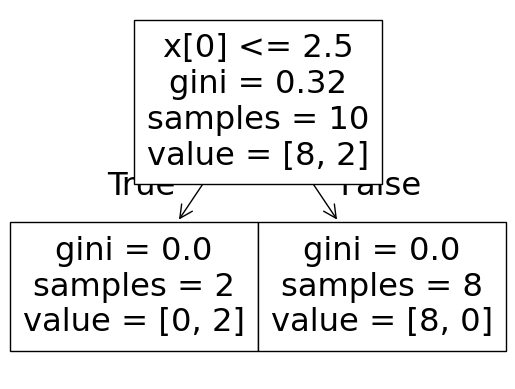

In [79]:
plot_tree(dt2)

<Axes: >

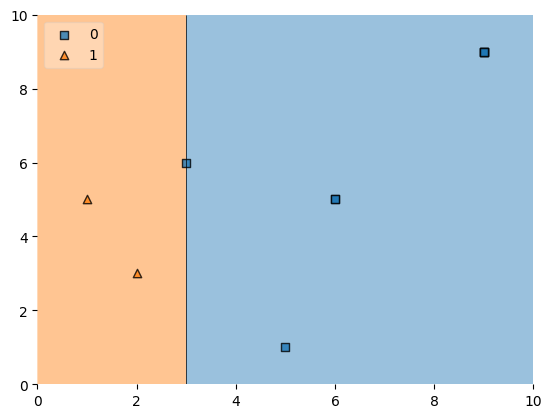

In [80]:

plot_decision_regions(x, y, clf=dt2, legend=2)

In [81]:
second_df['y_pred'] = dt2.predict(x)

In [82]:
second_df

,x1,x2,label,weights,y_pred
2,3,6,0,0.1,0
8,9,9,0,0.1,0
8,9,9,0,0.1,0
4,5,1,0,0.1,0
6,6,5,0,0.1,0
1,2,3,1,0.1,1
8,9,9,0,0.1,0
6,6,5,0,0.1,0
0,1,5,1,0.1,1
8,9,9,0,0.1,0


In [84]:
print(alpha1)

0.42364893019360184


In [85]:

query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1])

In [86]:
dt2.predict(query)

array([1])